<a href="https://colab.research.google.com/github/Mrdiegolopes/Mrdiegolopes/blob/main/Modelo_de_previs%C3%A3o_de_temperaturas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preparando o ambiente

Você trabalha como cientista de dados em uma empresa de meteorologia que coleta dados diários de temperatura ao longo dos anos. O objetivo da empresa é prever a temperatura de amanhã com base nas temperaturas anteriores, para fornecer uma previsão mais precisa. Para isso, você decide usar uma rede neural do tipo LSTM (Long Short-Term Memory), que é adequada para lidar com dados sequenciais.

Seu objetivo nesta oficina é construir um modelo de deep learning utilizando uma rede neural LSTM que possa prever a temperatura do dia seguinte com base nas temperaturas dos últimos 30 dias.

In [4]:
#importando biblioteca necessarias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

carregando e preparando os dados

Para simplificar, usar um conjunto de dados fictício ou dados históricos reais de temperaturas médias diárias. Vamos criar um conjunto de dados fictício de temperaturas para os últimos 100 dias.

In [5]:
# Gerando dados fictícios de temperaturas diárias para os últimos 100 dias
# A temperatura segue uma onda senoidal com um pouco de ruído para simular variação real

np.random.seed(0)

data = np.sin(np.linspace(0, 20, 100)) * 10 + 25 + np.random.normal(0, 1, 100)

In [7]:
# Transformando os dados em um DataFrame para facilitar a manipulação

df = pd.DataFrame( data, columns=['Temperatura'])
print(df.head())

   Temperatura
0    26.764052
1    27.406646
2    29.910104
3    32.937234
4    34.097184


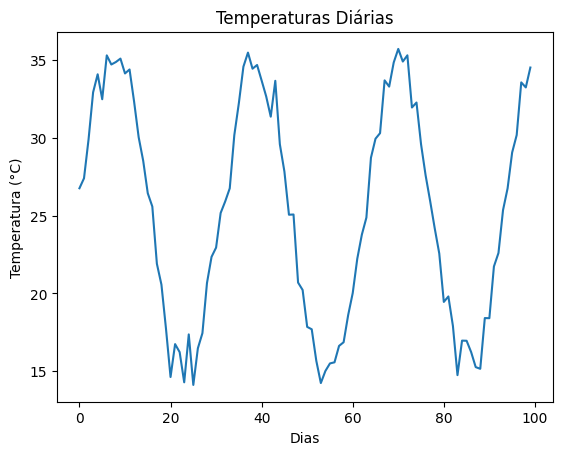

In [8]:
# Visualizando os dados de temperatura para ter uma ideia das tendências

plt.plot(df)
plt.title('Temperaturas Diárias')
plt.xlabel('Dias')
plt.ylabel('Temperatura (°C)')
plt.show()

pré processamento dos dados

 vamos preparar os dados para que possam ser usados em uma rede LSTM. Como LSTMs trabalham com sequências, vamos transformar nossos dados em janelas deslizantes, onde cada janela contém as temperaturas dos últimos 30 dias, e a rede deverá prever o 31o dia.

In [9]:
#criando rede com uma camada LSTM e uma camada densa para prever a temperatura.

train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)

def create_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_scaled, 30)
X_test, y_test = create_sequences(np.concatenate((train_scaled[-30:], test_scaled)), 30)

X_train = X_train.reshape(X_train.shape[0], 30, 1)
X_test = X_test.reshape(X_test.shape[0], 30, 1)


Construção da Rede LSTM

uma rede LSTM simples com uma camada LSTM e uma camada densa para prever a temperatura.

In [10]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(30, 1)))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


avaliação e previsão

In [11]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
real_values = scaler.inverse_transform(y_test.reshape(-1, 1))

# Avaliação
test_loss = model.evaluate(X_test, y_test)
print(f"\nPerda no conjunto de teste: {test_loss:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step - loss: 0.2383

Perda no conjunto de teste: 0.2383


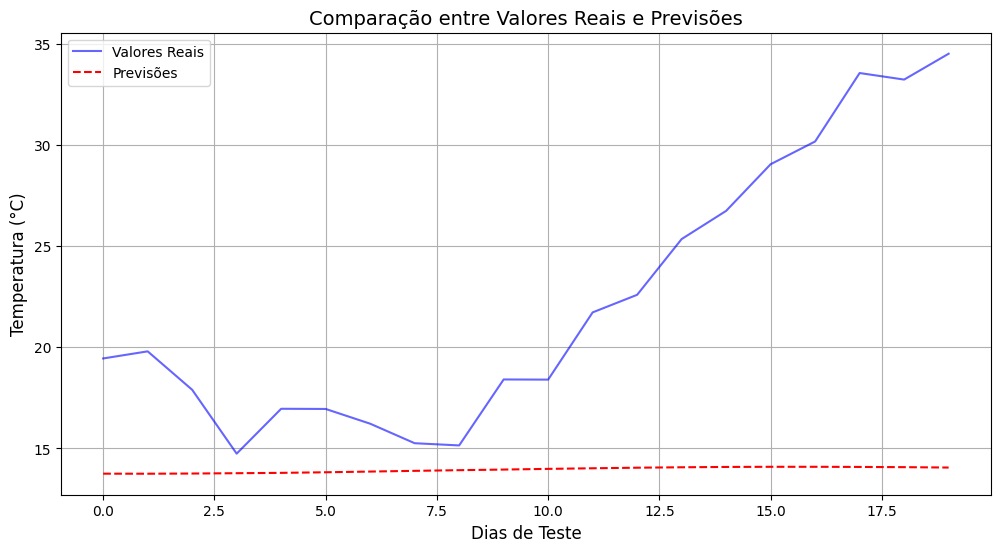

In [12]:
plt.figure(figsize=(12,6))
plt.plot(real_values, label='Valores Reais', color='blue', alpha=0.6)
plt.plot(predictions, label='Previsões', color='red', linestyle='--')
plt.title("Comparação entre Valores Reais e Previsões", fontsize=14)
plt.xlabel("Dias de Teste", fontsize=12)
plt.ylabel("Temperatura (°C)", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()